
# Project 2: Features Contributing to No-Show Medical Appointments
### Author: Doug Plager
### Udacity Nanodegree: Data Analyst
### Date: 2020_12_18

## Table of Contents
<ul>
<li><a href="#intro">Introduction and Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    Gather – Assess (Structural issues, NaNs, Data types and values, Duplicates) – Clean
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction and Research Questions

### Introduction

The dataset to be analyzed deals with __*Medical Appointment No-Shows*__ of over 100,000 Brazilian patient appointments
and is available from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).  Eleven of 14 data columns include feature (independent variable) data that may shed light on potential contributors to appointment no-shows (dependent variable).

### Research Question Development

In [1]:
# Import packages to be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'Magic Command' to plot visualizations inline with the notebook.
# For more, see http://ipython.readthedocs.io/en/stable/interactive/magics.html .
%matplotlib inline

# Load and view dataset for a preliminary assessment of the 
# data columns and values to aid in QUESTION development.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


**CONCLUSION:** The DataFrame (df) generally appears as one would expect.

In [2]:
# A more concise look at the data columns and the number of Non-Null values therein that are available for potential analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**CONCLUSIONS:**
* None of the columns have NULLs that might need to be dropped (i.e., "Non-Null" counts all equal the total number of rows).
* Column data types for 'PatientId', 'ScheduledDay', and 'AppointmentDay' seem unexpected.

In [3]:
# Overall statistics for numeric columns as another preliminary assessment of the data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**OBSERVATIONS:**
* 'PatientId' minimum, and perhaps the maximum, seems unexpected.
* 'Age' minimum of -1 is unexpected.
* 'Handcap' levels appear to range from 0 to 4.

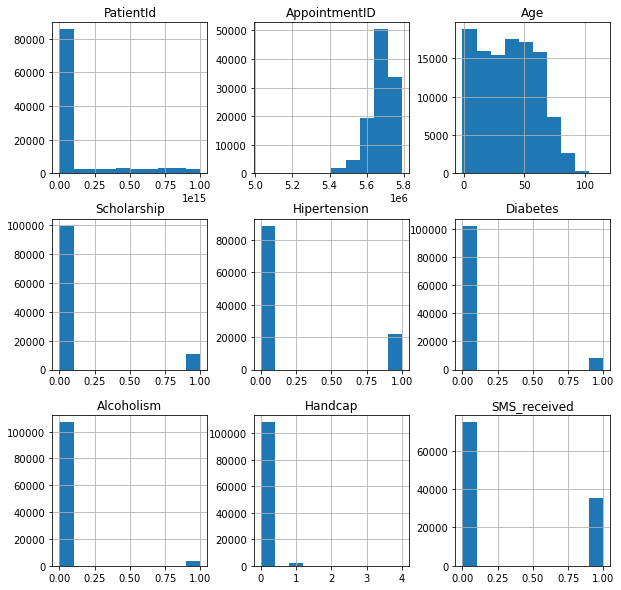

In [4]:
# An alternative preliminary view of the numeric data via Histograms.
df.hist(figsize=(10, 10));

**OBSERVATIONS:**
* Again, the 'PatientId' values seem a bit odd, but patient identification number formats can vary widely.

### Potential Questions to Address:
1. Are any features individually associated with decreased or increased relative frequency of being a "No-Show"?
  
  
2. Are there individual features associated with high-frequency "No-Show" patients?
  
  
3. Are there combinations of 2 or more features that are particularly associated with "No-Show" patients?

<a id='wrangling'></a>
## Data Wrangling


### Gather Data
Data already loaded and no additional primary data gathering performed.

### Assess and Clean Data

__*Structural issues:*__ 

By inspection:
* Rename 'No-show' to 'No_show' to allow `df.col_name.method()` type commands (next Code cell).
* Other column names appear slightly inconsistent, but generally acceptable as they are.
* As mentioned above, no other apparent DataFrame structural issues.

In [5]:
# Rename the 'No-show' column and test for the change.
# NOTE: Overall No-Show rate for this starting dataset is 22319 / (22319 + 88208) = 20.2% .
df = df.rename(columns = {'No-show': 'No_show'})
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

__*NULLs (NaNs):*__ As mentioned above, none of the columns have NULLs that need to be dropped.
 
__*Column Data Types:*__ Column data type changes are addressed further below.

__*Column Data Values (A through D) :*__

**(A) "Non-Categorical Numeric" column values**

In [6]:
# Check for unexpected minimum values within the "Non-Categorical Numeric" columns.
df[['PatientId', 'AppointmentID', 'Age']].min()

PatientId        3.921784e+04
AppointmentID    5.030230e+06
Age             -1.000000e+00
dtype: float64

#### Conclusions:
As indicated in the "Overall statistics" Observations further above:
* 'PatientId' minimum appears to be unexpectedly low and have multiple non-zero digits beyond the dot (.).
* 'AppointmentID' minimum looks fine.
* 'Age' minimum of -1 is unexpected.

In [7]:
# Check for unexpected maximum values within the "Non-Categorical Numeric" columns.
df[['PatientId', 'AppointmentID', 'Age']].max()

PatientId        9.999816e+14
AppointmentID    5.790484e+06
Age              1.150000e+02
dtype: float64

#### Conclusions:
As suggested in the "Overall statistics" Observations and other output further above:
* 'PatientId' maximum seems reasonable given the presence of other "e+14" values. However, it is unclear whether all 'PatientId' values should be composed of a specific number of digits (e.g., from 13 to 15 digits).  Thus, there may be additional erroneous 'PatientId' values, but I will leave it here at this time.
* Other maximums look fine.

In [8]:
# Check for unexpected duplicate 'AppointmentID' values.
df.AppointmentID.nunique()

110527

**Conclusion:** No duplicate 'AppointmentID' values as should be the case.

#### Addressing unexpected minimum 'PatientId' value:

In [9]:
# Look at unexpected minimum PatientId row.
df[df['PatientId'] == df.PatientId.min()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No


In [10]:
# Are all PRAIA DO SUA (NOTE: not just a standard final English "A") patient ids formatted similarly?
# Pull out the correct PRAIA DO SUA Neighbourhood spelling for possible Boolean indexing.
hood = df.iloc[100517, 6]
hood

'PRAIA DO SUÁ'

In [11]:
# Alternatively, use a Regular Expression to identify rows with PRAIA DO SUA-like 'Neighbourhood'.
# REM:  ^ , starts with    . , any character    * , >=0 of the preceding (itc, any character)
df[df.Neighbourhood.str.contains('^PRAIA DO.*')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
126,9.447582e+14,5633576,F,2016-04-28T09:37:22Z,2016-04-29T00:00:00Z,67,PRAIA DO SUÁ,0,0,1,0,0,0,Yes
127,4.224166e+12,5561194,M,2016-04-08T10:14:36Z,2016-04-29T00:00:00Z,42,PRAIA DO SUÁ,0,1,1,0,0,1,No
128,9.488697e+14,5571842,F,2016-04-12T09:41:01Z,2016-04-29T00:00:00Z,34,PRAIA DO SUÁ,1,0,0,0,0,1,Yes
129,5.537367e+13,5560735,F,2016-04-08T09:28:50Z,2016-04-29T00:00:00Z,22,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
131,4.755938e+13,5637150,M,2016-04-28T17:38:06Z,2016-04-29T00:00:00Z,29,PRAIA DO SUÁ,0,0,0,1,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110068,4.468281e+12,5779588,F,2016-06-07T07:06:38Z,2016-06-07T00:00:00Z,47,PRAIA DO CANTO,0,0,0,0,0,0,No
110072,8.989439e+14,5758767,F,2016-06-01T11:08:29Z,2016-06-06T00:00:00Z,55,PRAIA DO CANTO,0,0,0,0,0,1,No
110084,7.667838e+14,5752589,F,2016-05-31T12:01:26Z,2016-06-02T00:00:00Z,2,PRAIA DO SUÁ,0,0,0,0,0,0,No
110189,1.781149e+13,5767699,F,2016-06-03T06:45:22Z,2016-06-08T00:00:00Z,51,PRAIA DO SUÁ,0,0,0,1,0,1,Yes


**Conclusion:** The 39217.84439 PatientId is unexpected when compared to other PRAIA DO SUÁ PatientIds. 

**Questions:** Delete this row or attempt to correct?  Just one "bad" PatientId row?

In [12]:
# If row index=100517 is dropped, does the min() value for 'PatientId' look more like one would expect?  
# CONCLUSION: NO!
print(df.drop(100517, axis=0)['PatientId'].min())

43741.756519999995


In [13]:
# Find PatientIds containing a 'dot' followed by two or more digits.
# QUESTION:  Any better approach than converting 'PatientId' from  float  to  str??
# NOTE:  str.contains('.*".".*') appeared to not work  and  str.contains('.*\D..*') returned all rows because of  __.0 format.
# Regular Expression:  . , any character    * , >= 0 of the preceding    \D , not a digit    + , >= 1 of the preceding
df.PatientId = df.PatientId.astype(str)
patId_to_drop = df[df.PatientId.str.contains('.*\D..+')]
patId_to_drop

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.2847600001,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.756519999995,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


**Conclusion:** Only a handful of these odd PatientIds, so I will drop these just to avoid potential problems.

In [14]:
# Drop the five apparently "bad" PatientId rows using a  .index  approach.  Then recheck .info() and the PatientId minimum.
print(patId_to_drop.index)
df.drop(patId_to_drop.index, axis=0, inplace=True)

Int64Index([3950, 73228, 73303, 100517, 105430], dtype='int64')


In [15]:
# Check the number of rows remaining after the preceding .drop().  
# CONCLUSION: Looks good (110527 - 110522 = 5 dropped rows).
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110522 non-null  object
 1   AppointmentID   110522 non-null  int64 
 2   Gender          110522 non-null  object
 3   ScheduledDay    110522 non-null  object
 4   AppointmentDay  110522 non-null  object
 5   Age             110522 non-null  int64 
 6   Neighbourhood   110522 non-null  object
 7   Scholarship     110522 non-null  int64 
 8   Hipertension    110522 non-null  int64 
 9   Diabetes        110522 non-null  int64 
 10  Alcoholism      110522 non-null  int64 
 11  Handcap         110522 non-null  int64 
 12  SMS_received    110522 non-null  int64 
 13  No_show         110522 non-null  object
dtypes: int64(8), object(6)
memory usage: 12.6+ MB


In [16]:
# Minimum and maximum for 'PatientId' when string/object data type.
print(df.PatientId.min())
print(df.PatientId.max())

11111462625267.0
99999967293459.0


In [17]:
# Minimum and maximum for 'PatientId' when float data type.
df.PatientId = df.PatientId.astype(float)
print(df.PatientId.min())
print(df.PatientId.max())

5628261.0
999981631772427.0


**NOTE:** Given the 5628261 minimum value, it remains unclear what the expected 'PatientId' value format is (e.g., should it be composed of a specific number of digits). So, as mentioned above, there may be some additional erroneous 'PatientId' values, but because the PatientId values are not critical to my subsequent analyses, I will leave the PatientId values as they currently are.

#### Addressing unexpected minimum 'Age' value:

In [18]:
# Identify any 'Age' values <0 .
age_to_drop = df.query('Age < 0')
age_to_drop

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**Conclusion:** Only one row with an 'Age' of -1.  So, I will check to see if this patient (via their 'PatiendId') has other records with an appropriate 'Age' value to allow me to correct the -1 value, or I will drop this row just to avoid potential problems.

In [19]:
# Are there other entries for the -1 'Age' patient via the specific PatientId value?  
print(age_to_drop['PatientId'])
print(age_to_drop.iloc[0, 0])
df[df['PatientId'] == age_to_drop.iloc[0, 0]]

99832    4.659432e+14
Name: PatientId, dtype: float64
465943158731293.0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**Conclusion:** There are no other 'PatientId' 465943158731293 rows, so instead of correcting this patient's age, I will drop this 'Age' = -1 row.

In [20]:
# Drop the row with 'Age' value = -1.
print(age_to_drop.index)
df.drop(age_to_drop.index, axis=0, inplace=True)

Int64Index([99832], dtype='int64')


In [21]:
# Check the number of rows remaining after the preceding drop.  
# CONCLUSION: Looks good (110521).
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No_show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


**(B) "Categorical Binary" (and 'Handcap') column values**

In [22]:
# Check 'Gender' column for only 'F' or 'M' values.
df.Gender.value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

In [23]:
# Check several columns for only 0 or 1 "binary" values (or 0 to 4 for 'Handcap' column).
df.Scholarship.value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

In [24]:
df.Hipertension.value_counts()

0    88720
1    21801
Name: Hipertension, dtype: int64

In [25]:
df.Diabetes.value_counts()

0    102579
1      7942
Name: Diabetes, dtype: int64

In [26]:
df.Alcoholism.value_counts()

0    107161
1      3360
Name: Alcoholism, dtype: int64

In [27]:
df.Handcap.value_counts()

0    108280
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [28]:
df.SMS_received.value_counts()

0    75040
1    35481
Name: SMS_received, dtype: int64

In [29]:
df.No_show.value_counts()

No     88202
Yes    22319
Name: No_show, dtype: int64

**Conclusion:** As expected, all of the preceding categorical columns were "binary", except for the 'Handcap' column, which had five levels.

**(C) "Multi-Categorical" 'Neighbourhood' column values**

In [30]:
# Confirm that the data does not include an excessively high number of unique 'Neighbourhood' values.
# CONCLUSION: A reasonable number of only 81 unique values. 
df.Neighbourhood.nunique()

81

In [31]:
# Check for unexpected 'Neighbourhood' values by looking for very low  .value_counts()  tallies.
pd.set_option('display.max_rows', 100)
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3333
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1887
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

**Conclusion:** The three lowest 'Neighbourhood' values did not appear to result from a trivial error, e.g., just a spelling error. Thus, none of the data rows will be dropped based on an apparent trivial 'Neighbourhood' value error.

In [32]:
# Just returning the display of output rows to a lower number.
pd.set_option('display.max_rows', 10)
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

**(D) "datetime"-type column values**

In [33]:
# Check if all 'ScheduledDay' values conform to a "datetime" type value 
# (ALTERNATIVELY, I suspect just converting data type using  pd.to_datetime(df)  would likely throw an error 
# if there were some abnormality??).
df[df.ScheduledDay.str.match('20\d\d-[01]\d-[0123]\dT[012]\d:[0-5]\d:[0-5]\dZ')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


**Conclusion:** All 'ScheduledDay' values conform to a datetime-type value.

In [34]:
# Check if all 'AppointmentDay' values conform to a "datetime" type value.
df[df.AppointmentDay.str.match('20\d\d-[01]\d-[0123]\dT[012]\d:[0-5]\d:[0-5]\dZ')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


**Conclusion:** All 'AppointmentDay' values conform to a datetime-type value.

__*Column Data Types:*__ Revisited.

In [35]:
# Recheck column data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No_show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### Change to Final Preferred Column Data Types:

In [36]:
# Changing 'PatientId' from float64 to int64 and 'ScheduledDay' and 'AppointmentDay' from object/str to datetime64.
df.PatientId = df.PatientId.astype('int64')
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  int64              
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Neighbourhood   110521 non-null  object             
 7   Scholarship     110521 non-null  int64              
 8   Hipertension    110521 non-null  int64              
 9   Diabetes        110521 non-null  int64              
 10  Alcoholism      110521 non-null  int64              
 11  Handcap         110521 non-null  int64              
 12  SMS_received    110521 non-null  int64              
 13  No_show       

In [37]:
# Check for the earliest and latest dates in 'ScheduledDay' and 'AppointmentDay' columns.
df[['ScheduledDay', 'AppointmentDay']].min()

ScheduledDay     2015-11-10 07:13:56+00:00
AppointmentDay   2016-04-29 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [38]:
df[['ScheduledDay', 'AppointmentDay']].max()

ScheduledDay     2016-06-08 20:07:23+00:00
AppointmentDay   2016-06-08 00:00:00+00:00
dtype: datetime64[ns, UTC]

**Conclusion:** Nothing particularly unexpected for the preceding minimum and maximum dates.

__*Duplicates:*__

**Identify and Remove Any Duplicate Rows:**

In [39]:
# Obtain the number of duplicated rows.
df.duplicated().sum()

0

**Conclusion:** There are no duplicated rows that need to be dropped.

### Derived Columns Added to the DataFrame

#### Duration between Scheduled and Appointment Date

In [40]:
# Generate and eventually add a new column 'DaysBetween' for the number of days between 'ScheduledDay' and 'AppointmentDay'.
days_between = df.AppointmentDay - df.ScheduledDay
print(type(days_between))
days_between.head(20)

<class 'pandas.core.series.Series'>


0    -1 days +05:21:52
1    -1 days +07:51:33
2    -1 days +07:40:56
3    -1 days +06:30:29
4    -1 days +07:52:37
            ...       
15     2 days 15:12:33
16     0 days 15:08:13
17     0 days 14:31:03
18     2 days 13:05:42
19   -1 days +13:16:46
Length: 20, dtype: timedelta64[ns]

**QUESTION:** Where are the "-1 days" coming from and how do they compare to "0 days"?

In [41]:
# Take a closer look at the "-1 days" and "0 days" rows.
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,99948393975,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No
16,84574392942817,5633121,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,No
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
18,17135378245248,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No


**NOTE:** The "-1 days" appear to be **same-date appointments** and appear to arise because of the apparently universal use of a 00:00:00 time component for 'AppointmentDay' values. Ideally, one might want to exclude "immediate" (walk-in/emergency) appointments and first-day-of-life newborn "appointments", but not necessarily same-date appointments that were formally scheduled earlier in the day. However, this distinction appears difficult to assess.

**NOTE:** The "0 days" appear to be those appointments scheduled and attended within a 24-hour period, but on consecutive dates.

**CONCLUSION:** Because this analysis is focused on identifying features contributing to medical appointment no-shows, "immediate" same-date medical visits should be excluded and excluding all same-date appointments would likely provide a more meaningful "cleaned" dataset.

In [42]:
# Check for the number of -1 days and 0 days.  First, pull out the numeric "days" component.
num_of_days = days_between.dt.days
num_of_days

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Length: 110521, dtype: int64

In [43]:
# Identify the rows with "-1 days" (same date) between 'ScheduledDay' and 'AppointmentDay'.
num_of_days[num_of_days == -1]

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
110511   -1
110512   -1
110513   -1
110514   -1
110517   -1
Length: 38560, dtype: int64

**Conclusion:** 38560 of 
the rows are for same-date appointments, and later these will be excluded in some way.

In [44]:
# Just for comparison, identify the rows with "0 days" (< 24 hours on consecutive dates) between
# 'ScheduledDay' and 'AppointmentDay'.
num_of_days[num_of_days == 0]

12        0
13        0
14        0
16        0
17        0
         ..
110240    0
110289    0
110292    0
110429    0
110516    0
Length: 5213, dtype: int64

**Conclusion:** Substantially fewer rows with consecutive date 'ScheduledDay' and 'AppointmentDay'.

In [45]:
# An alternative approach to provide a "more intuitive" number of days between 'ScheduledDay' and 'AppointmentDay' dates;
# i.e., the previous "-1 days" (same date) and "0 days" (< 24 hours on consecutive dates) are now "0 days" and "1 days", 
# and so on, respectively.
days_between = df.AppointmentDay.dt.date - df.ScheduledDay.dt.date
print(type(days_between))
days_between

<class 'pandas.core.series.Series'>


0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Length: 110521, dtype: timedelta64[ns]

**NOTE:** Now, the "0 days" rows are the ones that will be excluded in some way, later.

In [46]:
# Convert the timedelta data type to numeric-only integer data type.
days_between = days_between.dt.days
days_between

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Length: 110521, dtype: int64

In [47]:
# Insert this 'DaysBetween' column in the index 5 column position.
df.insert(5, 'DaysBetween', days_between)
print(df.shape)
df

(110521, 15)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysBetween,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,35,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,35,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,41,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,41,38,MARIA ORTIZ,0,0,0,0,0,1,No


**Conclusion:** The DataFrame with the added 'DaysBetween' column looks correct (however, see further below with respect to a few negative 'DaysBetween' values).

In [48]:
# Because the above indicates that the rows with 'DaysBetween' = 0 correspond to same-date
# appointments, I would expect there to be very few, if any, No-Shows among these rows
# (although there could be some for appointments that were actually scheduled  
# earlier for a later time on the same date).
df.query('DaysBetween == 0')['No_show'].value_counts()

No     36768
Yes     1792
Name: No_show, dtype: int64

**Conclusion:** As expected, there was a substantially lower percentage, 1792/(1792 + 36768) = 4.6%, of No-Shows in the 'DaysBetween' = 0 group compared to that for the entire dataset, 22319/(22319 + 88208) = 20.2%, and this strengthens the argument to exclude the 'DaysBetween' = 0 data.

#### Convert 'DaysBetween' numeric data into categoric groups (inclusive: 0 to 7; 8 to 14; 15 to 28; 29 to 200 days)

In [49]:
# Group patients by 'DaysBetween' 
DaysBetweenGroup = pd.cut(df.DaysBetween, [0, 7, 14, 28, 200], include_lowest=True, labels=['days0_7', 'days8_14', 'days15_28', 'days29_over'])
print(type(DaysBetweenGroup))
DaysBetweenGroup

<class 'pandas.core.series.Series'>


0             days0_7
1             days0_7
2             days0_7
3             days0_7
4             days0_7
             ...     
110522    days29_over
110523    days29_over
110524    days29_over
110525    days29_over
110526    days29_over
Name: DaysBetween, Length: 110521, dtype: category
Categories (4, object): ['days0_7' < 'days8_14' < 'days15_28' < 'days29_over']

In [50]:
# Insert the 'DaysBetweenGroup' column into the DataFrame. 
df.insert(6, 'DaysBetweenGroup', DaysBetweenGroup)
print(df.shape)
df

(110521, 16)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysBetween,DaysBetweenGroup,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,days0_7,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,days0_7,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,days0_7,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,days0_7,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,days0_7,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,35,days29_over,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,35,days29_over,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,41,days29_over,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,41,days29_over,38,MARIA ORTIZ,0,0,0,0,0,1,No


**Conclusion:** The DataFrame with the added 'DaysBetweenGroup' column looks correct (but, again, see further below with respect to a few negative 'DaysBetween' values).

#### Convert 'Age' numeric data into categoric groups (inclusive: 0 to 18; 19 to 39; 40 to 60; 60 to 120)

In [51]:
# Confirm that there are 'Age' = 0 entries (since previous 'Age' minimum was -1).
df[df['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysBetween,DaysBetweenGroup,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
59,71844284745331,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,days0_7,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,2,days0_7,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,4,days0_7,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,2,days0_7,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,days0_7,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,16,days15_28,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577525313231,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,2,days0_7,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614245995575,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,days0_7,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218463343323,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,days0_7,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [52]:
# Check the No-Show rate of 'Age' = 0 patients.
df[df['Age'] == 0]['No_show'].value_counts()

No     2900
Yes     639
Name: No_show, dtype: int64

**Conclusion:** There are, indeed, age = 0 patients, and the No-Show rate for all age = 0 patients is 639/(639 + 2900) = 18.0%

In [53]:
# Compare to No-Show rate of 'Age' = 0 and 'DaysBetween' = 0 (same-date) patients.
df.query('Age == 0 & DaysBetween == 0')['No_show'].value_counts()

No     1357
Yes      51
Name: No_show, dtype: int64

**Conclusion:** 
* The No-Show rate for age = 0, same-date patients is 51/(51 + 1357) = 3.6%.
* The No-Show rate for age = 0, not-same-date patients is (639 - 51) / ((2900 + 639) - (1357 + 51)) = 27.6%.
* These No-Show rates, again, strengthen the argument to exclude the same-date ('DaysBetween' = 0) data.

In [54]:
# Group patients by 'Age'. 
AgeGroup = pd.cut(df.Age, [0, 18, 39, 60, 120], include_lowest=True, labels=['age0_18', 'age19_39', 'age40_60', 'age61_above'])
print(type(AgeGroup))
AgeGroup

<class 'pandas.core.series.Series'>


0         age61_above
1            age40_60
2         age61_above
3             age0_18
4            age40_60
             ...     
110522       age40_60
110523       age40_60
110524       age19_39
110525       age19_39
110526       age40_60
Name: Age, Length: 110521, dtype: category
Categories (4, object): ['age0_18' < 'age19_39' < 'age40_60' < 'age61_above']

In [55]:
# Insert the 'AgeGroup' column into the DataFrame. 
df.insert(8, 'AgeGroup', AgeGroup)
print(df.shape)
df

(110521, 17)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysBetween,DaysBetweenGroup,Age,AgeGroup,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,days0_7,62,age61_above,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,days0_7,56,age40_60,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,days0_7,62,age61_above,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,days0_7,8,age0_18,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,days0_7,56,age40_60,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,35,days29_over,56,age40_60,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,35,days29_over,51,age40_60,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,41,days29_over,21,age19_39,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,41,days29_over,38,age19_39,MARIA ORTIZ,0,0,0,0,0,1,No


**Conclusion:** The DataFrame with the added 'AgeGroup' column looks correct.

In [56]:
# Recheck current DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         110521 non-null  int64              
 1   AppointmentID     110521 non-null  int64              
 2   Gender            110521 non-null  object             
 3   ScheduledDay      110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay    110521 non-null  datetime64[ns, UTC]
 5   DaysBetween       110521 non-null  int64              
 6   DaysBetweenGroup  110516 non-null  category           
 7   Age               110521 non-null  int64              
 8   AgeGroup          110521 non-null  category           
 9   Neighbourhood     110521 non-null  object             
 10  Scholarship       110521 non-null  int64              
 11  Hipertension      110521 non-null  int64              
 12  Diabetes          110521 non-null  int64    

**Conclusion:** Looks like a handful of NULLs have been introduced in the 'DaysBetweenGroup' column.

In [57]:
# Check the rows having a NULL (NaN) in their 'DaysBetweenGroup' column.
dbg_to_drop = df[df.DaysBetweenGroup.isnull()]
dbg_to_drop

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysBetween,DaysBetweenGroup,Age,AgeGroup,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,-1,NaN,38,age19_39,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,-1,NaN,19,age19_39,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,-1,NaN,22,age19_39,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,-6,NaN,81,age61_above,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,-1,NaN,7,age0_18,TABUAZEIRO,0,0,0,0,0,0,Yes


**Conclusion:** As expected, five rows were identified (110521 - 110516 = 5) as having a NaN in the 'DaysBetweenGroup' column.  This occurred because of an unexpected negative 'DaysBetween' value due to an 'AppointmentDay' date preceding its respective 'ScheduledDay'.  Notably, all five of these rows had a 'No_show' value of 'Yes'.  These five rows will be dropped because of their apparently invalid 'DaysBetween' values with respect to their 'No_show' values.

In [58]:
# Drop the five 'DaysBetweenGroup' rows containing a NULL (NaN).  Alternatively, could use .dropna() function.
df.drop(dbg_to_drop.index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         110516 non-null  int64              
 1   AppointmentID     110516 non-null  int64              
 2   Gender            110516 non-null  object             
 3   ScheduledDay      110516 non-null  datetime64[ns, UTC]
 4   AppointmentDay    110516 non-null  datetime64[ns, UTC]
 5   DaysBetween       110516 non-null  int64              
 6   DaysBetweenGroup  110516 non-null  category           
 7   Age               110516 non-null  int64              
 8   AgeGroup          110516 non-null  category           
 9   Neighbourhood     110516 non-null  object             
 10  Scholarship       110516 non-null  int64              
 11  Hipertension      110516 non-null  int64              
 12  Diabetes          110516 non-null  int64    

**Conclusion:** The DataFrame no longer has any NULLs and should be in a useable "cleaned" state.
#### NOTE: "Same-Date" ('DaysBetween' = 0) and "Not-Same-Date" ('DaysBetween' > 0) appointment data are still together at this point.

### Removal of "Same-Date" Appointments for Final "Cleaned" Dataset

In [59]:
# MASK creation and use for generating a DataFrame with only "Not-Same-Date" rows; i.e., 'DaysBetween' > 0 
# for 'AppointmentDay' date subtract 'ScheduledDay' date.
not_same_date = df.DaysBetween > 0
print(not_same_date)
nsd_df = df[not_same_date]
nsd_df

0         False
1         False
2         False
3         False
4         False
          ...  
110522     True
110523     True
110524     True
110525     True
110526     True
Name: DaysBetween, Length: 110516, dtype: bool


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,DaysBetween,DaysBetweenGroup,Age,AgeGroup,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,2,days0_7,76,age61_above,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,2,days0_7,23,age19_39,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,2,days0_7,39,age19_39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,2,days0_7,19,age19_39,CONQUISTA,0,0,0,0,0,0,No
10,734536231958495,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,2,days0_7,30,age19_39,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,35,days29_over,56,age40_60,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,35,days29_over,51,age40_60,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,41,days29_over,21,age19_39,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,41,days29_over,38,age19_39,MARIA ORTIZ,0,0,0,0,0,1,No


**CONCLUSION:** After filtering for "Not-Same-Date" ('DaysBetween' > 0) appointments, the nsd_df DataFrame appears to be in good order (110516 - 38560 = 71956 rows).

In [60]:
# Recheck DataFrame column data types and Non-Null value counts.
# Conclusion: Looks good.
nsd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71956 entries, 5 to 110526
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   PatientId         71956 non-null  int64              
 1   AppointmentID     71956 non-null  int64              
 2   Gender            71956 non-null  object             
 3   ScheduledDay      71956 non-null  datetime64[ns, UTC]
 4   AppointmentDay    71956 non-null  datetime64[ns, UTC]
 5   DaysBetween       71956 non-null  int64              
 6   DaysBetweenGroup  71956 non-null  category           
 7   Age               71956 non-null  int64              
 8   AgeGroup          71956 non-null  category           
 9   Neighbourhood     71956 non-null  object             
 10  Scholarship       71956 non-null  int64              
 11  Hipertension      71956 non-null  int64              
 12  Diabetes          71956 non-null  int64              
 13  

In [61]:
# Recheck overall numeric column statistics.
nsd_df.describe()

,PatientId,AppointmentID,DaysBetween,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.195600e+04,7.195600e+04,71956.000000,71956.000000,71956.000000,71956.000000,71956.000000,71956.000000,71956.000000,71956.000000
mean,1.452666e+14,5.655041e+06,15.642490,38.503196,0.092709,0.208905,0.074726,0.025321,0.020026,0.493093
std,2.535703e+14,7.472252e+04,16.494511,22.925495,0.290027,0.406530,0.262951,0.157099,0.154075,0.499956
min,5.628261e+06,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.969538e+12,5.617795e+06,4.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.992563e+13,5.661166e+06,9.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.371858e+13,5.707178e+06,22.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999320e+14,5.784985e+06,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


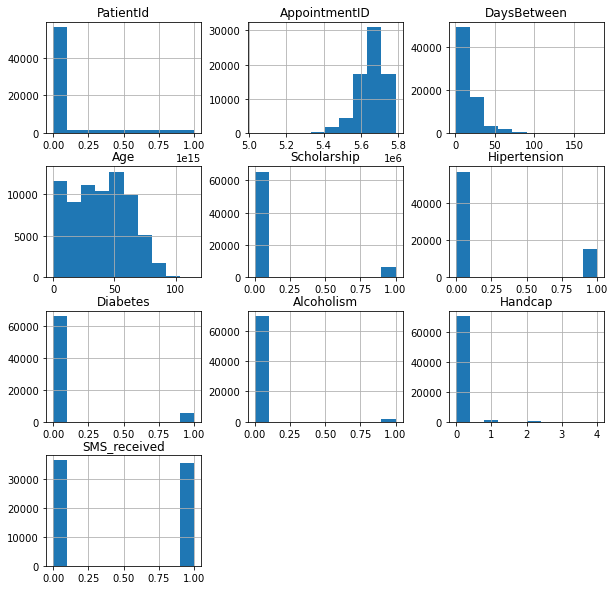

In [62]:
# Recheck numeric column histograms.
nsd_df.hist(figsize=(10, 10));

In [63]:
# Recheck overall "No-Show" counts in this "Not-Same-Date" dataset.
nsd_df.groupby('No_show').count()['PatientId']

No_show
No     51434
Yes    20522
Name: PatientId, dtype: int64

**Conclusions:**
* All rechecks look fine.
* NOTE that the overall No-Show rate after excluding "Same-Date" appointments for this "Final Cleaned Dataset" (nsd_df) is substantially higher, 20522 / (20522 + 51434) = 28.5%, than that for the starting dataset, 22319 / (22319 + 88208) = 20.2%.

<a id='eda'></a>
## Exploratory Data Analysis of "Not-Same-Date" Appointments

### Research Question 1: 
**Are any features individually associated with decreased or increased relative frequency of being a "No-Show"?**

#### Overall Relative Frequencies of "Shows" and "No-Shows" for the entire cleaned "Not-Same-Date" appointments dataset (nsd_df).

In [64]:
# Counts of overall "Shows" ('No') and "No-Shows" ('Yes') divided by the total row count for the entire nsd_df dataset.
show_no_show_cts = nsd_df.groupby('No_show').count()
print(show_no_show_cts['PatientId'], '\n')   # For verification.

print(nsd_df.No_show.count())                # For verification.

overall_rel_freqs = show_no_show_cts['PatientId'] / nsd_df.No_show.count()
overall_rel_freqs

No_show
No     51434
Yes    20522
Name: PatientId, dtype: int64 

71956


No_show
No     0.714798
Yes    0.285202
Name: PatientId, dtype: float64

#### Single Feature-Grouped "Show" and "No-Show" Relative Frequency Function

In [65]:
# Single Feature-grouped "Show" and "No-Show" Relative Frequencies function.

def relative_freqs(col_name):
    '''
    Groups nsd_df data based on the values within the passed 'col_name' (i.e., feature) 
    and returns the medical appointment "Show" (No) and "No-Show" (Yes) relative frequency for each subgroup.

    Parameter: col-name,  column name of a nsd_df DataFrame column with groupable (i.e., categorical) data.

    Returns: Two-level pandas.core.series.Series with the medical appointment "Show" (No) and "No-Show" (Yes) 
    relative frequencies.
    '''
    two_col_show_cts = nsd_df.groupby([col_name, 'No_show']).count()
    print(two_col_show_cts['PatientId'], '\n')   # For verification.

    one_col_cts = nsd_df.groupby(col_name).count()
    print(one_col_cts['PatientId'], '\n')        # For verification.

    rel_freqs = two_col_show_cts['PatientId'] / one_col_cts['PatientId']

    return rel_freqs

__*Gender*__ or __*DaysBetween*__ single feature-grouped "Show" and "No-Show" relative frequencies:

In [66]:
# First test of the  relative_freqs()  function.
gender_rel_freqs = relative_freqs('Gender')
gender_rel_freqs

Gender  No_show
F       No         34394
        Yes        13674
M       No         17040
        Yes         6848
Name: PatientId, dtype: int64 

Gender
F    48068
M    23888
Name: PatientId, dtype: int64 



Gender  No_show
F       No         0.715528
        Yes        0.284472
M       No         0.713329
        Yes        0.286671
Name: PatientId, dtype: float64

In [67]:
# Second test of the  relative_freqs()  function.
days_bw_rel_freqs = relative_freqs('DaysBetweenGroup')
days_bw_rel_freqs

DaysBetweenGroup  No_show
days0_7           No         24410
                  Yes         7772
days8_14          No          8361
                  Yes         3664
days15_28         No         10460
                  Yes         5118
days29_over       No          8203
                  Yes         3968
Name: PatientId, dtype: int64 

DaysBetweenGroup
days0_7        32182
days8_14       12025
days15_28      15578
days29_over    12171
Name: PatientId, dtype: int64 



DaysBetweenGroup  No_show
days0_7           No         0.758499
                  Yes        0.241501
days8_14          No         0.695301
                  Yes        0.304699
days15_28         No         0.671460
                  Yes        0.328540
days29_over       No         0.673979
                  Yes        0.326021
Name: PatientId, dtype: float64

#### Single Feature-Grouped Appointment "No-Show" Bar Chart Function

In [68]:
# No-Show Bar Chart plotting function.

def no_show_bar_chart(feature, two_level_rel_freqs, one_level_rel_freqs):
    '''
    Plots the "No-Show" (Yes) relative frequencies from a two-level MultiIndex "Show" (No) and "No-Show" (Yes)
    pandas Series along with the overall single-level "No-Show" relative frequency in a bar chart.
    
    Parameters:
        feature,  a string name of the Level 1 grouped-by feature of the two_level_rel_freqs Series.
        two_level_rel_freqs,  a two-level MultiIndex pandas Series of "Show" (No) and "No-Show" (Yes) relative
            frequencies from the relative_freqs(col_name) function.
        one_level_rel_freqs,  a single-level pandas Series of "Show" (No) and "No-Show" (Yes) relative frequencies  
            for the 'No_show' column of the starting DataFrame (i.e., nsd_df). 
    '''
    # Pull out the "No-Show" relative frequency values with a MultiIndex of ANY Level 1 rows (i.e., start:end)
    # AND with a Level 2 index == 'Yes' from the passed Single Feature-grouped 
    # "Show" and "No-Show" Relative Frequencies function Series.
    two_level_rel_freqs_yes = two_level_rel_freqs.loc[ : , 'Yes',  ]
    print(two_level_rel_freqs_yes, '\n')            # For verification.
    
    xticks2 = two_level_rel_freqs_yes.index
    
    
    # Pull out the overall "No-Show" (Yes) relative frequency value for the starting DataFrame (nsd_df)
    # so it can be plotted for comparison to the two-level relative frequencies.
    one_level_rel_freqs_yes = one_level_rel_freqs[one_level_rel_freqs.index == 'Yes'] 
    print(one_level_rel_freqs_yes, '\n')            # For verification.
    
    
    # Generate a list of the x-axis tick labels
    xticks = ['Overall']
    
    for i in range(0, len(two_level_rel_freqs_yes)):
        xticks = xticks + [xticks2[i]]   # list.append() did not work, perhaps because also a np.append() [just below]
    
    #print(xticks, '\n')                             # For verification.
    
    
    # BAR CHART THE OVERALL AND SINGLE FEATURE-SPECIFIC RELATIVE FREQUENCIES.

    # Bar Chart containing an "Overall" standard relative freq bar AND 
    # relative freq bars from a single grouped-by "categorical" column (i.e., feature). 
    width = 0.30   # Width of the bars.
    locations1 = np.arange(len(one_level_rel_freqs_yes))
    plt.bar(locations1, one_level_rel_freqs_yes, width, color='r', alpha=0.7, label='Overall')
    
    locations2 = np.arange(len(two_level_rel_freqs_yes))
    locations2 = locations2 + 1
    
    #print(type(locations2))         # To identify "locations2" as <class 'numpy.ndarray'>
    locations3 = np.append(locations1, locations2)   # To obtain locators for the xticks.
    #print(locations3)               # For verification.
    
    plt.bar(locations2, two_level_rel_freqs_yes, width, color='b', alpha=0.7, label=feature)
    plt.xticks(locations3, xticks)
    plt.ylabel('No-Show Relative Frequency', fontsize=14)
    plt.title(feature + '-Grouped Appointment "No-Show" Rates')
    plt.legend()

__*Gender*__ or __*DaysBetween*__ single feature-grouped "No-Show" bar chart:

Gender
F    0.284472
M    0.286671
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



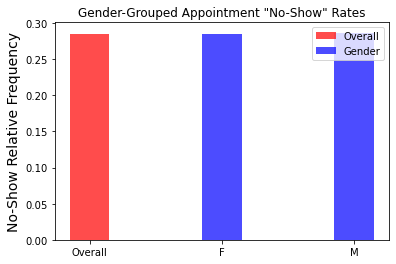

In [69]:
# First test of the  no_show_bar_chart()  function.
no_show_bar_chart('Gender', gender_rel_freqs, overall_rel_freqs)

**CONCLUSION:** No apparent effect of *Gender* on appointment No-Show rate. 

DaysBetweenGroup
days0_7        0.241501
days8_14       0.304699
days15_28      0.328540
days29_over    0.326021
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



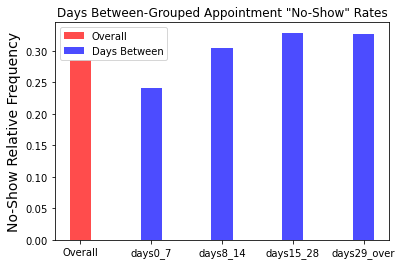

In [70]:
# Second test of the  no_show_bar_chart()  function.
no_show_bar_chart('Days Between', days_bw_rel_freqs, overall_rel_freqs)

**CONCLUSION:** An increasing number of days between the date on which an appointment is scheduled and that on which it is attended (*DaysBetween*) appears to correlate with an increasing appointment No-Show rate over the first 28-day period.

__*AgeGroup*__ single feature-grouped "No-Show" relative frequencies and bar chart:

AgeGroup     No_show
age0_18      No         11496
             Yes         5537
age19_39     No         13137
             Yes         6612
age40_60     No         15789
             Yes         5540
age61_above  No         11012
             Yes         2833
Name: PatientId, dtype: int64 

AgeGroup
age0_18        17033
age19_39       19749
age40_60       21329
age61_above    13845
Name: PatientId, dtype: int64 

AgeGroup
age0_18        0.325075
age19_39       0.334802
age40_60       0.259740
age61_above    0.204623
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



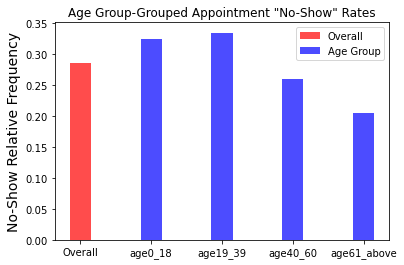

In [71]:
age_group_rel_freqs = relative_freqs('AgeGroup')
no_show_bar_chart('Age Group', age_group_rel_freqs, overall_rel_freqs)

**CONCLUSIONS:** 
* Appointment No-Show rates appear to be relatively high for younger patients, with a possible peak No-Show rate in the 19- to 39-years old range.
* Appointment No-Show rates appear to inversely decrease in patient groups over 40-years old.

__*Neighbourhood*__ single feature-grouped "No-Show" relative frequencies and bar charts:

In [72]:
# Limit the 'Neighbourhood' "Show" and "No-Show" relative frequencies to those neighbourhoods having at least 200 rows.

# Generate the 'Neighbourhood' "Show" and "No-Show" relative frequencies.
neighbourhood_rel_freqs = relative_freqs('Neighbourhood')

neighbourhood_rel_freqs

Neighbourhood    No_show
AEROPORTO        No            4
                 Yes           1
ANDORINHAS       No         1033
                 Yes         491
ANTÔNIO HONÓRIO  No          137
                            ... 
TABUAZEIRO       Yes         526
UNIVERSITÁRIO    No           81
                 Yes          31
VILA RUBIM       No          462
                 Yes         136
Name: PatientId, Length: 159, dtype: int64 

Neighbourhood
AEROPORTO                 5
ANDORINHAS             1524
ANTÔNIO HONÓRIO         180
ARIOVALDO FAVALESSA     175
BARRO VERMELHO          285
                       ... 
SÃO JOSÉ               1376
SÃO PEDRO              1584
TABUAZEIRO             1924
UNIVERSITÁRIO           112
VILA RUBIM              598
Name: PatientId, Length: 80, dtype: int64 



Neighbourhood    No_show
AEROPORTO        No         0.800000
                 Yes        0.200000
ANDORINHAS       No         0.677822
                 Yes        0.322178
ANTÔNIO HONÓRIO  No         0.761111
                              ...   
TABUAZEIRO       Yes        0.273389
UNIVERSITÁRIO    No         0.723214
                 Yes        0.276786
VILA RUBIM       No         0.772575
                 Yes        0.227425
Name: PatientId, Length: 159, dtype: float64

In [73]:
# Identify Neighbourhoods with too few total rows to provide a meaningfully representative "No-Show" rate.
neighbourhood_cts = nsd_df.Neighbourhood.value_counts()
nbh_cts_below100 = neighbourhood_cts[neighbourhood_cts < 200]
nbh_cts_below100

FRADINHOS                      193
ANTÔNIO HONÓRIO                180
ARIOVALDO FAVALESSA            175
MÁRIO CYPRESTE                 173
ENSEADA DO SUÁ                 163
                              ... 
PONTAL DE CAMBURI               41
ILHA DO BOI                     23
ILHA DO FRADE                    8
AEROPORTO                        5
ILHAS OCEÂNICAS DE TRINDADE      2
Name: Neighbourhood, Length: 16, dtype: int64

In [74]:
# Drop the Neighbourhoods with "below 200" rows.
neighbourhood_rel_freqs.drop(nbh_cts_below100.index, inplace=True)
neighbourhood_rel_freqs

Neighbourhood   No_show
ANDORINHAS      No         0.677822
                Yes        0.322178
BARRO VERMELHO  No         0.722807
                Yes        0.277193
BELA VISTA      No         0.709793
                             ...   
SÃO PEDRO       Yes        0.284722
TABUAZEIRO      No         0.726611
                Yes        0.273389
VILA RUBIM      No         0.772575
                Yes        0.227425
Name: PatientId, Length: 128, dtype: float64

**Conclusion:** At this point, the 'neighbourhood_rel_freqs' MultiIndex pandas Series is limited to those neighbourhoods with at least 200 rows of data.

Neighbourhood
ANDORINHAS        0.322178
BARRO VERMELHO    0.277193
BELA VISTA        0.290207
BENTO FERREIRA    0.279211
BOA VISTA         0.248869
BONFIM            0.300351
CARATOÍRA         0.319929
CENTRO            0.287665
COMDUSA           0.232068
CONQUISTA         0.298729
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



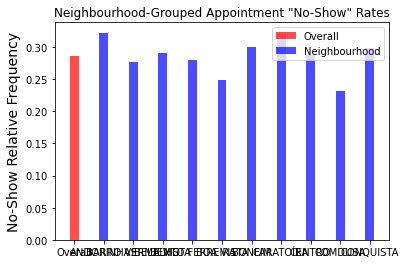

In [75]:
# Limit the number of neighbourhoods being plotted at one time to 10.
no_show_bar_chart('Neighbourhood', neighbourhood_rel_freqs.iloc[0:20], overall_rel_freqs)

**CONCLUSIONS:** 
* The relatively large number of unique neighbourhoods (64 at this point) complicates the plotting of this data with my common "no_show_bar_chart" function. Turning the xtick labels to a vertical, rather than a horizontal, orientation could alleviate the problem.
* By adjusting the .iloc indexes in the preceding Code cell (by hand or via a 'for' loop), one can see the "No-Show" rates for each of the neighbourhoods, and these rates tend to "bounce around" the "Overall" (red) No-Show rate.
* More in-depth comparisons of the 'Neighbourhood' No-Show rates would require an alternative approach to viewing this data.

#### Alternative Approach of Viewing Neighbourhood No-Show Rates

In [76]:
# ALTERNATIVE APPROACH to look at the 'Neighbourhood' No-Show rates for neighbourhoods having >= 200 appointment rows,
neighbourhood_rel_freqs_yes = neighbourhood_rel_freqs.loc[ : , 'Yes',  ]
print(neighbourhood_rel_freqs_yes, '\n')            # For verification and a nice alphabetical listing.

# DESCRIPTIVE STATISTICS for the 'Neighbourhood' No-Show rates.
neighbourhood_rel_freqs_yes.describe()

Neighbourhood
ANDORINHAS        0.322178
BARRO VERMELHO    0.277193
BELA VISTA        0.290207
BENTO FERREIRA    0.279211
BOA VISTA         0.248869
                    ...   
SÃO CRISTÓVÃO     0.271586
SÃO JOSÉ          0.271076
SÃO PEDRO         0.284722
TABUAZEIRO        0.273389
VILA RUBIM        0.227425
Name: PatientId, Length: 64, dtype: float64 



count    64.000000
mean      0.277723
std       0.039474
min       0.192878
25%       0.256737
50%       0.276644
75%       0.299134
max       0.383710
Name: PatientId, dtype: float64

In [77]:
# SORT by value (rather than by index) as an alternative listing to see which neighbourhoods have
# relatively low or high No-Show rates.
neighbourhood_rel_freqs_yes.sort_values()

Neighbourhood
SOLON BORGES         0.192878
DE LOURDES           0.202703
MATA DA PRAIA        0.218615
DO QUADRO            0.218638
DO CABRAL            0.220994
                       ...   
SANTA CLARA          0.338583
SANTOS DUMONT        0.348917
ITARARÉ              0.364973
JESUS DE NAZARETH    0.374929
GURIGICA             0.383710
Name: PatientId, Length: 64, dtype: float64

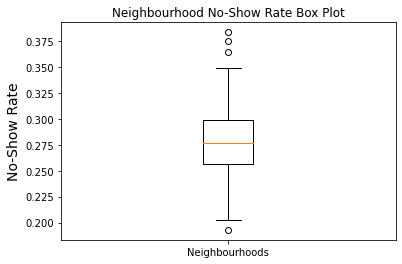

In [78]:
# Box plot of the 'Neighbourhood' No-Show rates.
plt.boxplot(neighbourhood_rel_freqs_yes)
plt.xticks([1], ['Neighbourhoods'])
plt.ylabel('No-Show Rate', fontsize=14)
plt.title('Neighbourhood No-Show Rate Box Plot');

**CONCLUSION:** There are several neighbourhoods with relatively low and high No-Show rates (several being formal "outliers").  It could be beneficial to scrutinize these neighbourhoods for features that distinctly contribute to respectively decreasing or increasing their No-Show rates.

__*Scholarship*__ single feature-grouped "No-Show" relative frequencies and bar chart:

Scholarship  No_show
0            No         47096
             Yes        18189
1            No          4338
             Yes         2333
Name: PatientId, dtype: int64 

Scholarship
0    65285
1     6671
Name: PatientId, dtype: int64 

Scholarship
0    0.278609
1    0.349723
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



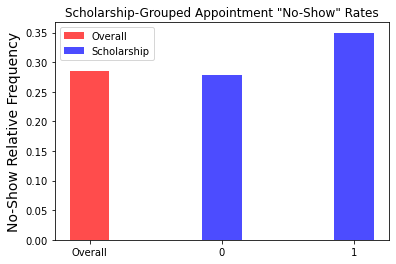

In [79]:
scholarship_rel_freqs = relative_freqs('Scholarship')
no_show_bar_chart('Scholarship', scholarship_rel_freqs, overall_rel_freqs)

**CONCLUSION:** The approximately 9% of appointments involving patients on Brasilian welfare showed an apparent increase in No-Show rate.

__*Hipertension*__ single feature-grouped "No-Show" relative frequencies and bar chart:

Hipertension  No_show
0             No         39938
              Yes        16986
1             No         11496
              Yes         3536
Name: PatientId, dtype: int64 

Hipertension
0    56924
1    15032
Name: PatientId, dtype: int64 

Hipertension
0    0.298398
1    0.235232
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



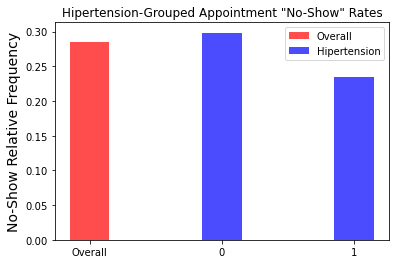

In [80]:
hipertension_rel_freqs = relative_freqs('Hipertension')
no_show_bar_chart('Hipertension', hipertension_rel_freqs, overall_rel_freqs)

**CONCLUSION:** The approximately 20% of appointments involving patients with Hipertension showed an apparent decrease in No-Show rate.

__*Diabetes*__ single feature-grouped "No-Show" relative frequencies and bar chart:

Diabetes  No_show
0         No         47399
          Yes        19180
1         No          4035
          Yes         1342
Name: PatientId, dtype: int64 

Diabetes
0    66579
1     5377
Name: PatientId, dtype: int64 

Diabetes
0    0.288079
1    0.249582
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



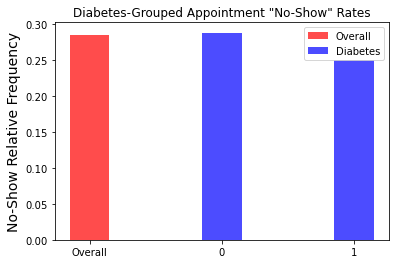

In [81]:
diabetes_rel_freqs = relative_freqs('Diabetes')
no_show_bar_chart('Diabetes', diabetes_rel_freqs, overall_rel_freqs)

**CONCLUSION:** The approximately 7% of appointments involving patients with Diabetes showed an apparent decrease in No-Show rate.

__*Alcoholism*__ single feature-grouped "No-Show" relative frequencies and bar chart:

Alcoholism  No_show
0           No         50233
            Yes        19901
1           No          1201
            Yes          621
Name: PatientId, dtype: int64 

Alcoholism
0    70134
1     1822
Name: PatientId, dtype: int64 

Alcoholism
0    0.283757
1    0.340834
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



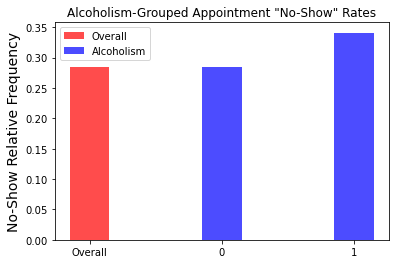

In [82]:
alcoholism_rel_freqs = relative_freqs('Alcoholism')
no_show_bar_chart('Alcoholism', alcoholism_rel_freqs, overall_rel_freqs)

**CONCLUSION:** The 2.5% of appointments involving patients with Alcoholism showed an apparent increase in No-Show rate.

__*Handcap*__ single feature-grouped "No-Show" relative frequencies and bar chart:

Handcap  No_show
0        No         50461
         Yes        20188
1        No           888
         Yes          297
2        No            78
         Yes           34
3        No             6
         Yes            2
4        No             1
         Yes            1
Name: PatientId, dtype: int64 

Handcap
0    70649
1     1185
2      112
3        8
4        2
Name: PatientId, dtype: int64 

Handcap
0    0.285751
1    0.250633
2    0.303571
3    0.250000
4    0.500000
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



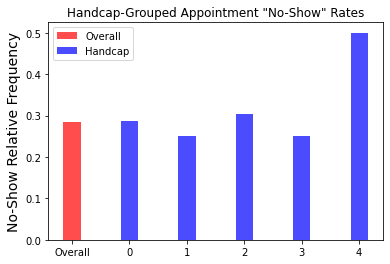

In [83]:
handcap_rel_freqs = relative_freqs('Handcap')
no_show_bar_chart('Handcap', handcap_rel_freqs, overall_rel_freqs)

**CONCLUSION:** The 'Handcap' (handicapped) patient appointment subgroups having a sufficient number of total rows, i.e., level 0 (no handicap) to level 2, had No-Show rates around that of the Overall dataset.

__*SMS_received*__ single feature-grouped "No-Show" relative frequencies and bar chart:

SMS_received  No_show
0             No         25737
              Yes        10738
1             No         25697
              Yes         9784
Name: PatientId, dtype: int64 

SMS_received
0    36475
1    35481
Name: PatientId, dtype: int64 

SMS_received
0    0.294393
1    0.275753
Name: PatientId, dtype: float64 

No_show
Yes    0.285202
Name: PatientId, dtype: float64 



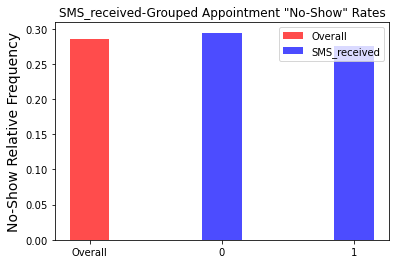

In [84]:
SMS_received_rel_freqs = relative_freqs('SMS_received')
no_show_bar_chart('SMS_received', SMS_received_rel_freqs, overall_rel_freqs)

**CONCLUSION:** The approximately one-half of appointments involving patients that did not (0) and did (1) receive an SMS reminder only showed a slight increase and slight decrease in No-Show rate, respectively, compared to the Overall No-Show rate.

### Research Question 2:
**Are there individual features associated with high-frequency "No-Show" patients?**

In [85]:
# First, check for the number of unique 'PatientId' values among the 71956 records.  
nsd_df['PatientId'].nunique()

45837

**CONCLUSION:** The large percentage (over 50%) of unique 'PatientId' values (and the short time period of the appointments in this dataset) suggests that there are too few appointments per patient to meaningfully identify a large subset of high-frequency "No-Show" patients.  So, the answer to this question will not be pursued here.

### Research Question 3:
**Are there combinations of 2 or more features that are particularly associated with patient No-Show rates?** 

For example, does receiving an SMS message influence the "No-Show" rate with increasing duration between the 'ScheduledDay' and the 'AppointmentDay' (i.e., 'DaysBetweenGroup')?

In [86]:
# Generate the "Show" and "No-Show" counts after grouping by 'DaysBetweenGroup' and 'SMS_received'.
three_col_show_cts = nsd_df.groupby(['DaysBetweenGroup', 'SMS_received', 'No_show']).count()
three_col_show_cts = three_col_show_cts['PatientId']
three_col_show_cts

DaysBetweenGroup  SMS_received  No_show
days0_7           0             No         15607
                                Yes         5028
                  1             No          8803
                                Yes         2744
days8_14          0             No          3326
                                           ...  
days15_28         1             Yes         2813
days29_over       0             No          2933
                                Yes         1710
                  1             No          5270
                                Yes         2258
Name: PatientId, Length: 16, dtype: int64

In [87]:
# Generate the total counts after grouping by 'DaysBetweenGroup' and 'SMS_received'.
two_col_total_cts = nsd_df.groupby(['DaysBetweenGroup', 'SMS_received']).count()
two_col_total_cts = two_col_total_cts['PatientId']
two_col_total_cts

DaysBetweenGroup  SMS_received
days0_7           0               20635
                  1               11547
days8_14          0                5021
                  1                7004
days15_28         0                6176
                  1                9402
days29_over       0                4643
                  1                7528
Name: PatientId, dtype: int64

In [88]:
# Generate the "Show" and "No-Show" relative frequencies for the two feature-grouped data.
dbg_sms_rel_freqs = three_col_show_cts / two_col_total_cts
dbg_sms_rel_freqs

DaysBetweenGroup  SMS_received  No_show
days0_7           0             No         0.756336
                                Yes        0.243664
                  1             No         0.762363
                                Yes        0.237637
days8_14          0             No         0.662418
                                             ...   
days15_28         1             Yes        0.299192
days29_over       0             No         0.631704
                                Yes        0.368296
                  1             No         0.700053
                                Yes        0.299947
Name: PatientId, Length: 16, dtype: float64

In [89]:
# Pull out the No-Show (Yes) relative frequencies.
dbg_sms_no_show_rates = dbg_sms_rel_freqs.loc[ : , : , 'Yes', ]
dbg_sms_no_show_rates

DaysBetweenGroup  SMS_received
days0_7           0               0.243664
                  1               0.237637
days8_14          0               0.337582
                  1               0.281125
days15_28         0               0.373219
                  1               0.299192
days29_over       0               0.368296
                  1               0.299947
Name: PatientId, dtype: float64

[-0.1  0.9  1.9  2.9]
DaysBetweenGroup
days0_7        0.243664
days8_14       0.337582
days15_28      0.373219
days29_over    0.368296
Name: PatientId, dtype: float64
[0.1 1.1 2.1 3.1]
DaysBetweenGroup
days0_7        0.237637
days8_14       0.281125
days15_28      0.299192
days29_over    0.299947
Name: PatientId, dtype: float64


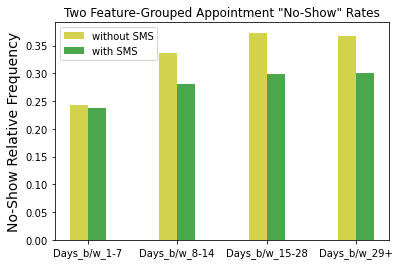

In [90]:
# Generate a bar chart for the two feature-grouped "No-Show" (Yes) relative frequencies.
width = 0.20

locations_woS = np.arange(len(dbg_sms_no_show_rates)/2) - width/2
print(locations_woS)
heights_woS = dbg_sms_no_show_rates.loc[ : , 0, ]
print(heights_woS)

locations_wS = np.arange(len(dbg_sms_no_show_rates)/2) + width/2
print(locations_wS)
heights_wS = dbg_sms_no_show_rates.loc[ : , 1, ]
print(heights_wS)

plt.bar(locations_woS, heights_woS, width, color='y', alpha=0.7, label="without SMS")
plt.bar(locations_wS, heights_wS, width, color='g', alpha=0.7, label="with SMS")

xticks = ['Days_b/w_1-7', 'Days_b/w_8-14', 'Days_b/w_15-28', 'Days_b/w_29+']
plt.xticks(np.arange(len(dbg_sms_no_show_rates)/2), xticks)

plt.ylabel('No-Show Relative Frequency', fontsize=14)
plt.title('Two Feature-Grouped Appointment "No-Show" Rates')
plt.legend();

**CONCLUSIONS:** 
* Although both the single feature(SMS)-grouped data (end of "Research Question 1" section) and the two feature-grouped data for 1 to 7 days between appointment scheduling and attendance (left-most pair of bars in preceding bar chart) appear to show only a slight reduction in No-Show rate with receipt of an SMS message, the potential benefit of SMS message appointment reminders is more strongly suggested for appointments scheduled more than 7 days in advance.
* The reduction in No-Show rate with receipt of an SMS message for appointments scheduled more than 7 days in advance appears to be relatively constant.

<a id='conclusions'></a>
## Summary of Conclusions

For this set of medical appointments, which were not scheduled and attended on the same date:


> 1) Over the first 28 days, No-Show rates increased with the number of days between the appointment scheduling and attendance dates.  NOTE: Perhaps logistic regression to statistically analyze?

> 2) The No-Show rate was relatively high in the 0- to 18-year old group, peaked in the 19- to 39-year old group, and declined with age thereafter.

> 3) There were several neighbourhoods with particularly low or high No-Show rates that could be analyzed more deeply in an attempt to identify features contributing to their notable No-Show rates.

> 4) Grouping the data by a single "binary" feature resulted in decreased (Hipertension and Diabetes) or increased (Scholarship and Alcoholism) No-Show rates.  NOTE: Perhaps Chi-squared analyses to statisticallly analyze?

> 5) A relatively constant decrease in No-Show rate was observed for patients sent SMS reminders, but only when their appointments were scheduled more than 7 days in advance.

**Limitations:** 
* The single city source (Vitoria, Brazil, apparently) of this data limits the preceding observations to Vitoria and not to the whole of the Brazil population. 


* The short time period of this data is another limitation.  
  * As mentioned in "Research Question 2", above, this precluded the alternative approach of identifying high- and low-frequency "No-Show" patients and attempting to determine contributing features to these individuals' respective high and low No-Show rates.
  * Also, the extension of any of the preceding observations to the entire year in Vitoria may not be valid.
  
  
* The apparent date-only (i.e., time always 00:00:00) data for 'AppointmentDay' also led to exclusion of all "same-date" appointments, even those appointments that may have formally been scheduled earlier in the day for later on that same date.  Thus, the preceding No-Show rate observations only apply to appointments scheduled for the consecutive date or later.  


* Any observations involving relatively small subgroups should, at best, be considered with caution (e.g., neighbourhood-specific data having <200 rows, 'Handcap' level 3 and 4 data, and, perhaps, 'Alcoholism' = 1 data).


* A potential limitation is the apparently unclear format of the 'PatientId' values, with the concern that this could be a complicating factor for patient-specific data analysis.